# Dados sobre MS_GERAL

### Bibliotecas

In [1]:
# Manipulação de dados
import pandas as pd
import numpy as np

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc

### Configuração de dados

In [2]:
# Ao colocar None vai apresentar todas as colunas
pd.set_option ("display.max_rows", None, "display.max_columns", None)

### Estilo de gráfico

In [3]:
%config InlineBackend.figure_format='retina'
sns.set(font_scale=1.5)
sns.set_style('darkgrid',
              {'xtick.bottom' : True,
               'ytick.left': True,
               'grid.linestyle':'--',
               'font.monospace': ['Computer Modern Typewriter'],
               'axes.edgecolor' : 'white'})

### Importando os dados

In [4]:
MS_GERAL=pd.read_csv("../data/ms_geral.csv")

### Substituindo os valores

In [5]:
# Substituir em toda a tabela
MS_GERAL=MS_GERAL.replace("sim",1)
MS_GERAL=MS_GERAL.replace("siim",1)
MS_GERAL=MS_GERAL.replace("sim ",1)
MS_GERAL=MS_GERAL.replace("nao",0)
MS_GERAL=MS_GERAL.replace("não",0)
MS_GERAL=MS_GERAL.replace("sim | nao","inconclusivo")

### Lidando com datas

In [6]:
#tira /
MS_GERAL["dia_publicacao"]=MS_GERAL["dia_publicacao"].str.replace("/","-")

In [7]:
#adicionar o ano
MS_GERAL["dia_publicacao"]=MS_GERAL["dia_publicacao"]+"-2020"

In [8]:
#transformar em datetime
MS_GERAL["dia_publicacao"]=pd.to_datetime(MS_GERAL["dia_publicacao"],dayfirst=True)

In [9]:
# Renomear a coluna
MS_GERAL=MS_GERAL.rename({'dia_publicacao': 'data'}, axis=1)

In [10]:
# Visualizar dataframe
MS_GERAL

,texto,ministro,link,data,pandemia,morte_publicacao,atualizacao_casos,noticia_falsa,recomendacao_publicacao,situacao_atual,tipo_publicacao,origem_publicacao,publico_alvo\n
0,minsaude\r\nVerificado\r\n🇧🇷O Governo do Brasi...,mandetta,https://www.instagram.com/p/B96odaGATbI/,2020-03-19,1,0,0,0,0,0,arte,ms,geral
1,minsaude\r\nVerificado\r\nCoronavírus | Orient...,mandetta,https://www.instagram.com/p/B97PHlGA3lP/,2020-03-19,1,0,0,0,1,0,video,ms,geral
2,minsaude\r\nVerificado\r\n🔬“Este é o ano dos l...,mandetta,https://www.instagram.com/p/B97ibkWg1DT/,2020-03-19,1,0,0,0,0,0,foto,ms,geral
3,minsaude\r\nVerificado\r\nO Brasil 🇧🇷 unindo f...,mandetta,https://www.instagram.com/p/B970wa_A-fD/,2020-03-19,1,0,0,0,1,0,arte,ms,geral
4,minsaude\r\nVerificado\r\nO envolvimento de to...,mandetta,https://www.instagram.com/p/B9761PBga_O/,2020-03-19,1,0,0,0,1,0,arte,ms,Idosos
5,minsaude\r\nVerificado\r\nEnquanto muitos pode...,mandetta,https://www.instagram.com/p/B99lFc4AYQO/,2020-03-20,1,0,0,0,1,0,arte | foto,ms,geral
6,minsaude\r\nVerificado\r\nO avanço do #coronav...,mandetta,https://www.instagram.com/p/B992bRdgzoU/,2020-03-20,1,0,0,0,1,1,video,ms,geral
7,minsaude\r\nVerificado\r\nJá falamos sobre as ...,mandetta,https://www.instagram.com/p/B9_kTttgfMN/,2020-03-21,1,0,0,0,1,0,arte,ms,geral
8,minsaude\r\nVerificado\r\nQuem tem mais de 60 ...,mandetta,https://www.instagram.com/p/B9_oNrYg4hj/,2020-03-21,1,0,0,0,1,0,video,ms,Idosos
9,minsaude\r\nVerificado\r\nLixos abertos com ac...,mandetta,https://www.instagram.com/p/B9__1Vxg8ja/,2020-03-21,0,0,0,0,1,0,arte,ms,geral


### Tabela com publicações da pandemia

In [11]:
MS_GERAL_PANDEMIA=MS_GERAL[MS_GERAL['pandemia']==1]

In [12]:
MS_GERAL_PANDEMIA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 0 to 445
Data columns (total 13 columns):
texto                      350 non-null object
ministro                   350 non-null object
link                       349 non-null object
data                       350 non-null datetime64[ns]
pandemia                   350 non-null int64
morte_publicacao           350 non-null int64
atualizacao_casos          350 non-null object
noticia_falsa              350 non-null int64
recomendacao_publicacao    350 non-null int64
situacao_atual             350 non-null object
tipo_publicacao            350 non-null object
origem_publicacao          350 non-null object
publico_alvo
              350 non-null object
dtypes: datetime64[ns](1), int64(4), object(8)
memory usage: 38.3+ KB


# RESULTADOS

#### 1. Quantas das publicações são atualizações de casos? (Lembrando que todas as publicações de atualização de casos são sobre a pandemia)

In [13]:
MS_GERAL_PANDEMIA["atualizacao_casos"].value_counts()

0               279
1                67
inconclusivo      4
Name: atualizacao_casos, dtype: int64

In [14]:
# Criando tabela com index e chamando as colunas
atualizacao=pd.DataFrame(MS_GERAL_PANDEMIA["atualizacao_casos"].value_counts())
atualizacao=atualizacao.reset_index()
atualizacao.columns=["atualizacao_casos","qtd"]

# Substituindo valores
atualizacao["atualizacao_casos"]=atualizacao["atualizacao_casos"].replace(1,"sim") 
atualizacao["atualizacao_casos"]=atualizacao["atualizacao_casos"].replace(0,"não") 

#Trocando os nomes 
atualizacao=atualizacao.rename({'atualizacao_casos': 'Atualização de casos'}, axis=1)

# Visualizar
atualizacao

,Atualização de casos,qtd
0,não,279
1,sim,67
2,inconclusivo,4


#### 2. Quantas das publicações sobre pandemia retratam a situação atual?

In [15]:
MS_GERAL_PANDEMIA["situacao_atual"].value_counts()

0               253
1                93
inconclusivo      4
Name: situacao_atual, dtype: int64

In [16]:
# Criando tabela com index e chamando as colunas
atualidades=pd.DataFrame(MS_GERAL_PANDEMIA["situacao_atual"].value_counts())
atualidades=atualidades.reset_index()
atualidades.columns=["situacao_atual","qtd"]

# Substituindo valores
atualidades["situacao_atual"]=atualidades["situacao_atual"].replace(1,"sim") 
atualidades["situacao_atual"]=atualidades["situacao_atual"].replace(0,"não") 

#Trocando os nomes
atualidades=atualidades.rename({'situacao_atual': 'Situação atual'}, axis=1)

# Visualizar
atualidades

,Situação atual,qtd
0,não,253
1,sim,93
2,inconclusivo,4


#### 3. Visão geral das notícias falsas

In [17]:
MS_GERAL["noticia_falsa"].value_counts()

0    437
1      9
Name: noticia_falsa, dtype: int64

In [18]:
noticiafalsa=pd.DataFrame(MS_GERAL["noticia_falsa"].value_counts())

In [19]:
# Criando tabela com index e chamando as colunas
noticiafalsa=pd.DataFrame(MS_GERAL["noticia_falsa"].value_counts())
noticiafalsa=noticiafalsa.reset_index()
noticiafalsa.columns=["noticia_falsa","qtd"]

# Substituindo valores
noticiafalsa["noticia_falsa"]=noticiafalsa["noticia_falsa"].replace(1,"sim") 
noticiafalsa["noticia_falsa"]=noticiafalsa["noticia_falsa"].replace(0,"não")  

#Trocando os nomes
noticiafalsa=noticiafalsa.rename({'noticia_falsa': 'Notícias falsas'}, axis=1)

# Visualizar
noticiafalsa

,Notícias falsas,qtd
0,não,437
1,sim,9


#### 4. Quantas das notícias falsas também são da pandemia?

In [20]:
MS_GERAL_PANDEMIA["noticia_falsa"].value_counts()

0    344
1      6
Name: noticia_falsa, dtype: int64

In [21]:
# Criando tabela com index e chamando as colunas
noticiafalsa_pandemia=pd.DataFrame(MS_GERAL_PANDEMIA["noticia_falsa"].value_counts())
noticiafalsa_pandemia=noticiafalsa_pandemia.reset_index()
noticiafalsa_pandemia.columns=["noticia_falsa","qtd"]

# Substituindo valores
noticiafalsa_pandemia["noticia_falsa"]=noticiafalsa_pandemia["noticia_falsa"].replace(1,"sim") 
noticiafalsa_pandemia["noticia_falsa"]=noticiafalsa_pandemia["noticia_falsa"].replace(0,"não")   

#Trocando os nomes
noticiafalsa_pandemia=noticiafalsa_pandemia.rename({'noticia_falsa': 'Notícias falsas na pandemia'}, axis=1)

# Visualizar
noticiafalsa_pandemia

,Notícias falsas na pandemia,qtd
0,não,344
1,sim,6


#### 5. Qual ministro mais desmente notícia falsa no contexto geral?

In [22]:
# Tabela dos ministros
nfg_ministros=MS_GERAL[MS_GERAL['noticia_falsa']==1][['ministro','noticia_falsa']]
nfg_ministros=nfg_ministros.reset_index(drop=True)
nfg_ministros=nfg_ministros.rename({'noticia_falsa': 'Notícias falsas'}, axis=1)
nfg_ministros=nfg_ministros.rename({'ministro': 'Ministro'}, axis=1)

In [23]:
nfg_ministros

,Ministro,Notícias falsas
0,mandetta,1
1,mandetta,1
2,mandetta,1
3,mandetta,1
4,mandetta,1
5,mandetta,1
6,mandetta,1
7,pazuello,1
8,pazuello,1


In [24]:
nf_mandetta=MS_GERAL[MS_GERAL['noticia_falsa']>0][MS_GERAL['ministro']=="mandetta"][['ministro','noticia_falsa']]
nf_mandetta=nf_mandetta.reset_index(drop = True)

nf_teich=MS_GERAL[MS_GERAL['noticia_falsa']>0][MS_GERAL['ministro']=="teich"][['ministro','noticia_falsa']]
nf_teich=nf_teich.reset_index(drop=True)

nf_pazuello=MS_GERAL[MS_GERAL['noticia_falsa']>0][MS_GERAL['ministro']=="pazuello"][['ministro','noticia_falsa']]
nf_pazuello=nf_pazuello.reset_index(drop=True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


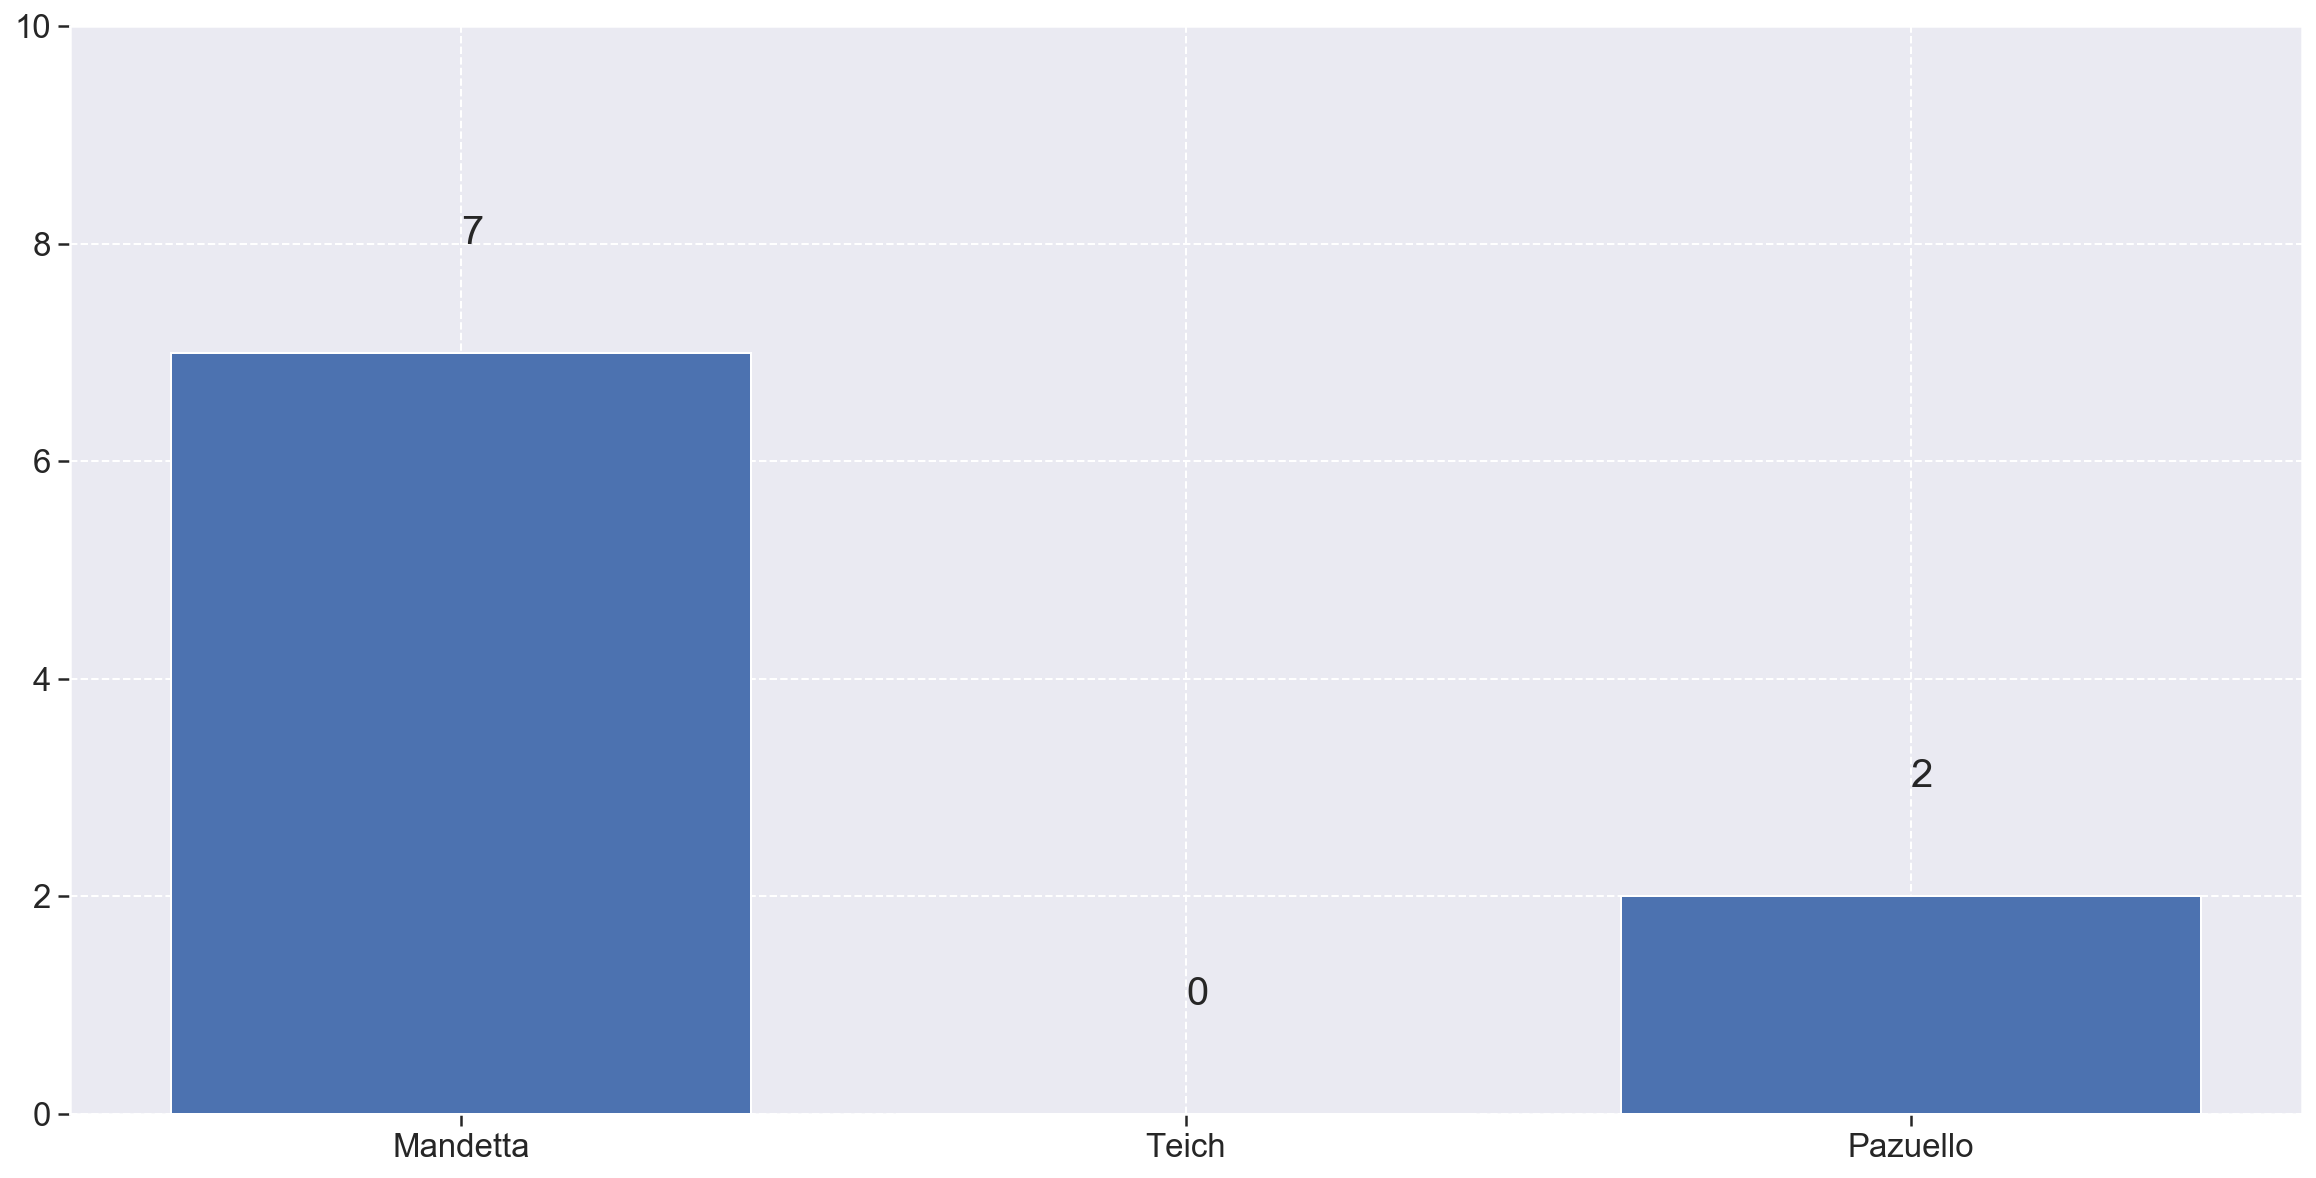

In [25]:
fig=plt.figure(figsize=(20,10))

# Make a fake dataset:
height=[len(nf_mandetta), len(nf_teich), len(nf_pazuello)]
bars=('Mandetta', 'Teich', 'Pazuello')
x_pos=np.arange(len(bars))
 
# Create bars
plt.bar(x_pos, height)
 
# Create names on the x-axis
plt.xticks(x_pos, bars)
plt.yticks(np.arange(0, 12, 2))

# Text on the top of each barplot
for i in range(len(height)):
    plt.text(x = x_pos[i] -.0, y = height[i]+1, s = height[i], size = 20)
    # plt.text(x = -.4, y = height[0]+1, s = height[0], size = 22)

# Show graphic
plt.show()

#### 6. Qual ministro mais desmente notícia falsa no contexto da pandemia?

In [26]:
# Tabela dos ministros
nfg_ministros_pandemia=MS_GERAL_PANDEMIA[MS_GERAL_PANDEMIA['noticia_falsa']==1][['ministro','noticia_falsa']]
nfg_ministros_pandemia=nfg_ministros_pandemia.reset_index(drop=True)
nfg_ministros_pandemia=nfg_ministros_pandemia.rename({'noticia_falsa': 'Notícias falsas na pandemia'}, axis=1)
nfg_ministros_pandemia=nfg_ministros_pandemia.rename({'ministro': 'Ministro'}, axis=1)

In [27]:
nfg_ministros_pandemia

,Ministro,Notícias falsas na pandemia
0,mandetta,1
1,mandetta,1
2,mandetta,1
3,mandetta,1
4,mandetta,1
5,pazuello,1


In [28]:
nf_mandetta_pandemia=MS_GERAL_PANDEMIA[MS_GERAL_PANDEMIA['noticia_falsa']>0][MS_GERAL_PANDEMIA['ministro']=="mandetta"][['ministro','noticia_falsa']]
nf_mandetta_pandemia=nf_mandetta_pandemia.reset_index(drop=True)

nf_teich_pandemia=MS_GERAL_PANDEMIA[MS_GERAL_PANDEMIA['noticia_falsa']>0][MS_GERAL_PANDEMIA['ministro']=="teich"][['ministro','noticia_falsa']]
nf_teich_pandemia=nf_teich_pandemia.reset_index(drop=True)

nf_pazuello_pandemia=MS_GERAL_PANDEMIA[MS_GERAL_PANDEMIA['noticia_falsa']>0][MS_GERAL_PANDEMIA['ministro']=="pazuello"][['ministro','noticia_falsa']]
nf_pazuello_pandemia=nf_pazuello_pandemia.reset_index(drop=True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


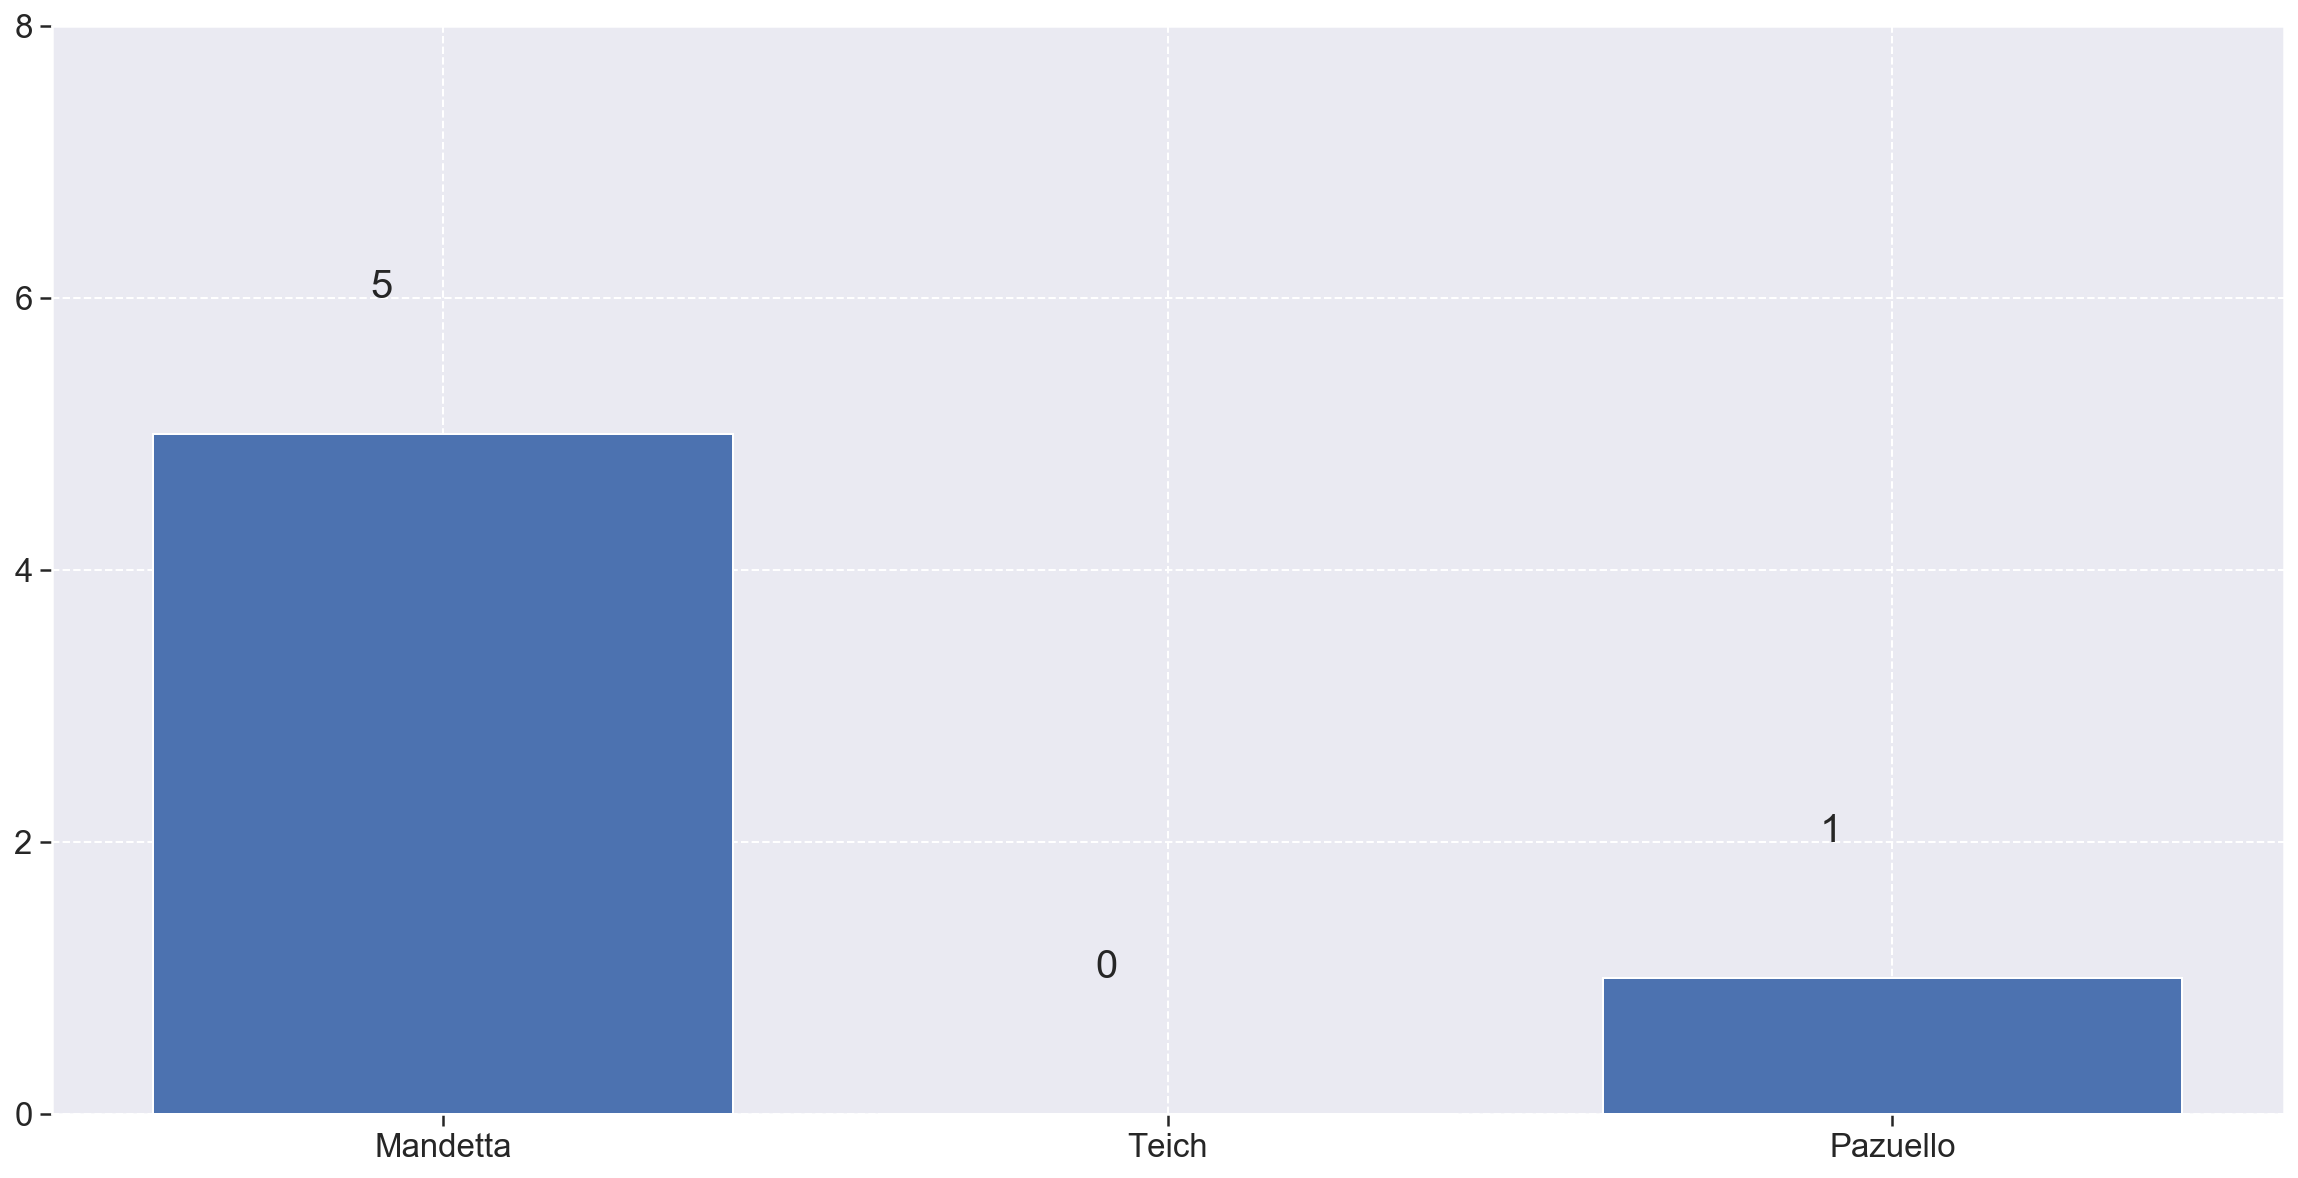

In [29]:
fig=plt.figure(figsize=(20,10))

# Make a fake dataset:
height=[len(nf_mandetta_pandemia), len(nf_teich_pandemia), len(nf_pazuello_pandemia)]
bars=('Mandetta', 'Teich', 'Pazuello')
y_pos=np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.yticks(np.arange(0, 10, 2))

# Text on the top of each barplot
for i in range(len(height)):
    plt.text(x = x_pos[i] -.1, y = height[i]+1, s = height[i], size = 20)
    # plt.text(x = -.4, y = height[0]+1, s = height[0], size = 22)
    
# Show graphic
plt.show()

#### 7. Qual ministro mais mencionou morte nas publicações sobre a pandemia? 

In [30]:
# Tabela dos ministros
ministros_morte=MS_GERAL_PANDEMIA[MS_GERAL_PANDEMIA['morte_publicacao']==1][['ministro','morte_publicacao']]
ministros_morte=ministros_morte.reset_index(drop=True)
ministros_morte=ministros_morte.rename({'morte_publicacao': 'Menciona morte'}, axis=1)
ministros_morte=ministros_morte.rename({'ministro': 'Ministro'}, axis=1)

In [31]:
ministros_morte

,Ministro,Menciona morte
0,mandetta,1
1,mandetta,1
2,mandetta,1
3,mandetta,1
4,mandetta,1
5,mandetta,1
6,mandetta,1
7,mandetta,1
8,mandetta,1
9,mandetta,1


In [32]:
mandetta_morte=MS_GERAL_PANDEMIA[MS_GERAL_PANDEMIA['morte_publicacao']>0][MS_GERAL_PANDEMIA['ministro']=="mandetta"][['ministro','morte_publicacao']]
mandetta_morte=mandetta_morte.reset_index(drop=True)

teich_morte=MS_GERAL_PANDEMIA[MS_GERAL_PANDEMIA['morte_publicacao']>0][MS_GERAL_PANDEMIA['ministro']=="teich"][['ministro','morte_publicacao']]
teich_morte=teich_morte.reset_index(drop=True)

pazuello_morte=MS_GERAL_PANDEMIA[MS_GERAL_PANDEMIA['morte_publicacao']>0][MS_GERAL_PANDEMIA['ministro']=="pazuello"][['ministro','morte_publicacao']]
pazuello_morte=pazuello_morte.reset_index(drop=True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


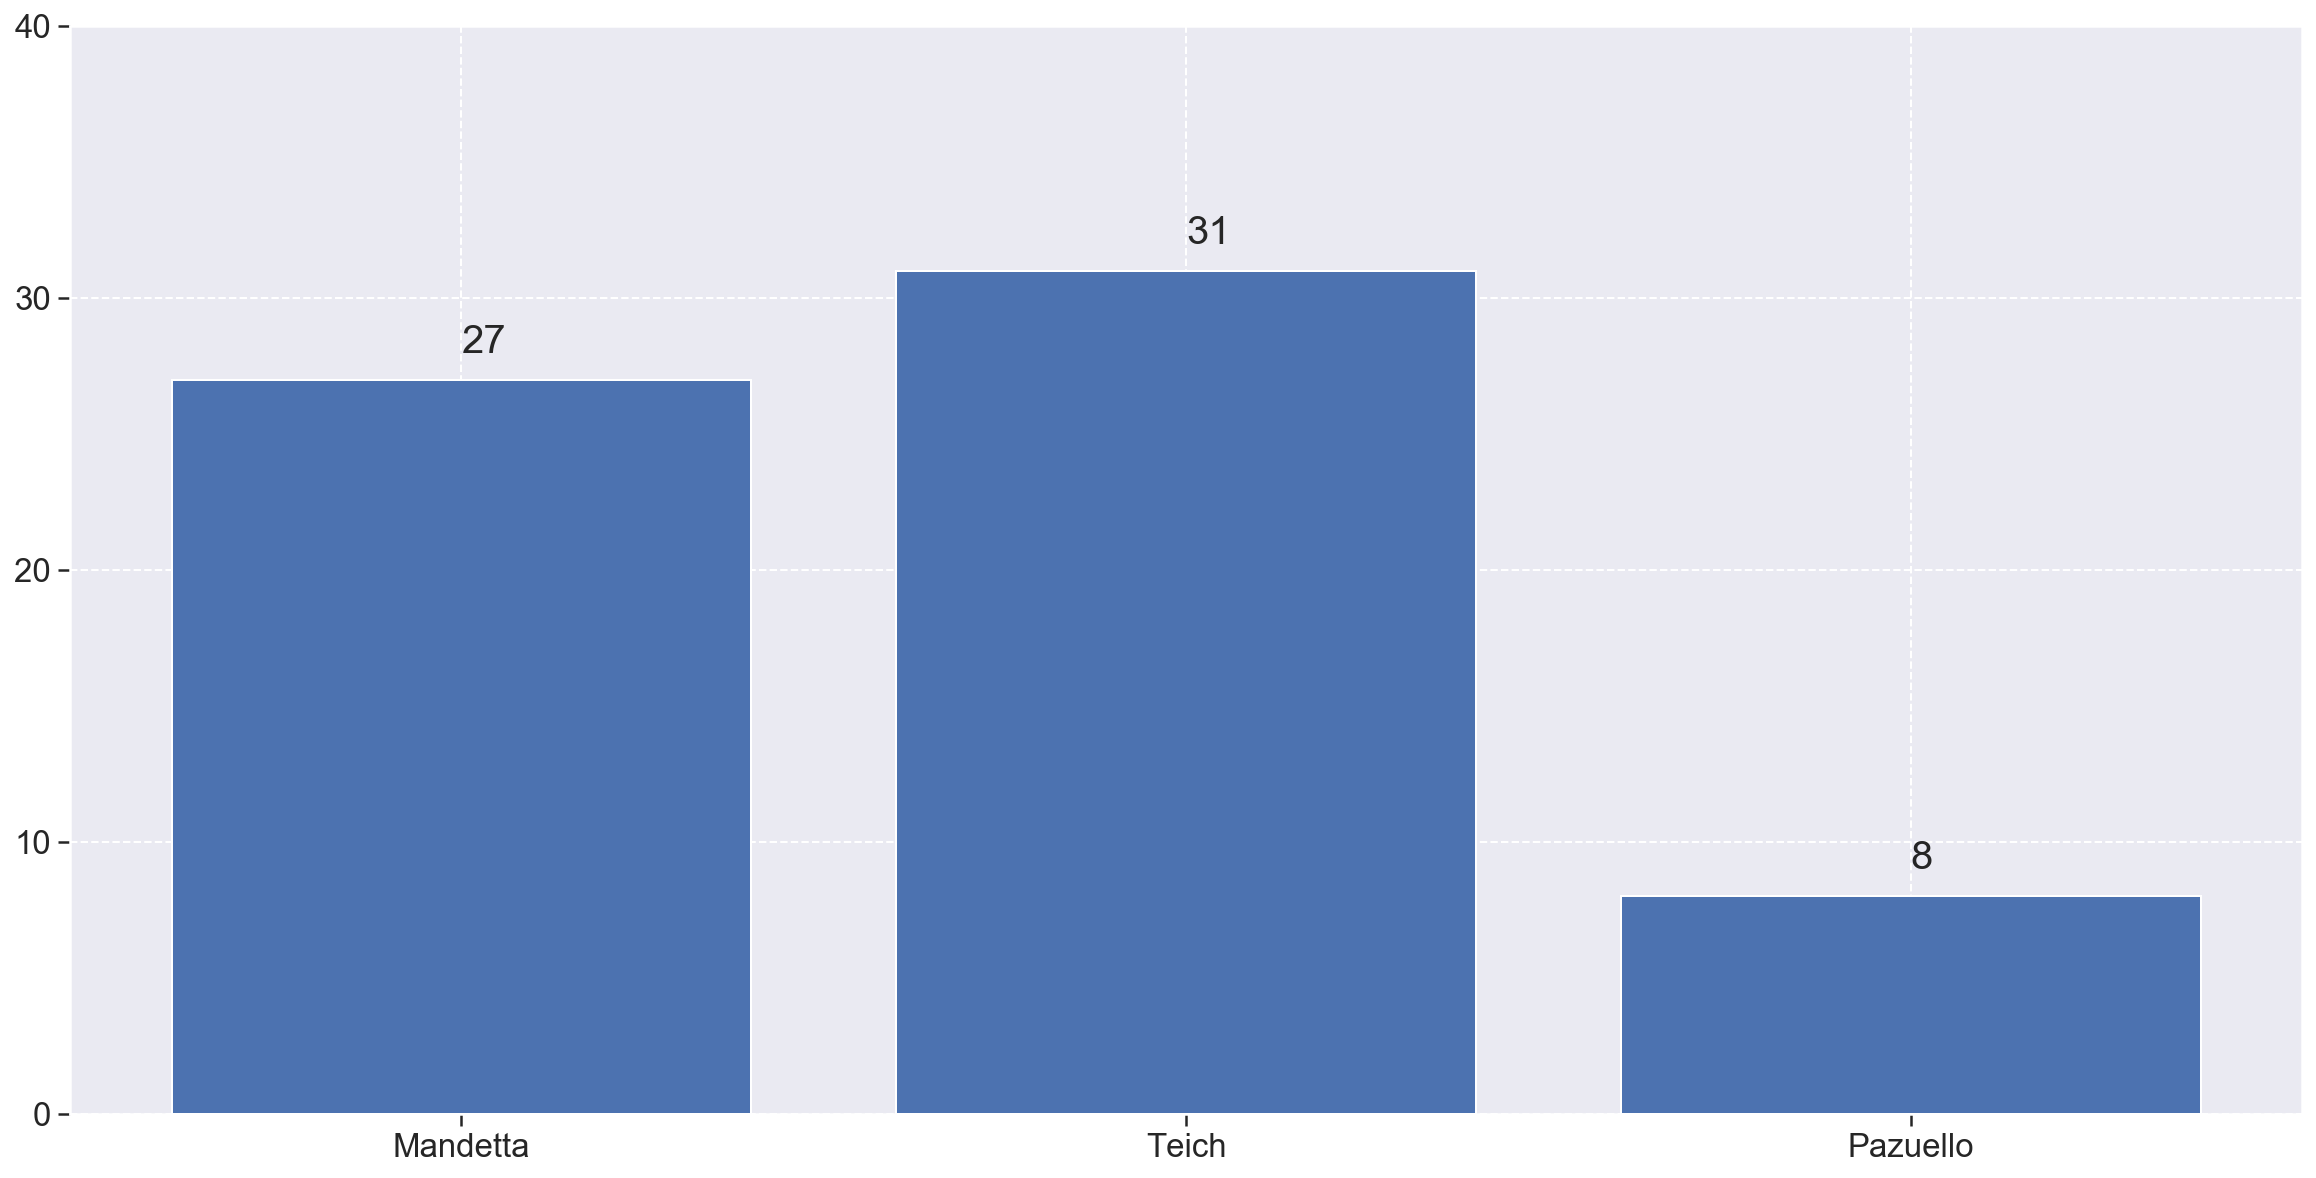

In [33]:
fig=plt.figure(figsize=(20,10))

# Make a fake dataset:
height=[len(mandetta_morte), len(teich_morte), len(pazuello_morte)]
bars=('Mandetta', 'Teich', 'Pazuello')
y_pos=np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.yticks(np.arange(0, 50, 10))

# Text on the top of each barplot
for i in range(len(height)):
    plt.text(x = x_pos[i] -.0, y = height[i]+1, s = height[i], size = 20)
    # plt.text(x = -.4, y = height[0]+1, s = height[0], size = 22)

# Show graphic
plt.show()

#### 8. Qual ministro mais reportou a atualização de casos?

In [34]:
# Tabelas dos ministros
ministros_atualizacao=MS_GERAL_PANDEMIA[MS_GERAL_PANDEMIA['atualizacao_casos']==1][['ministro','atualizacao_casos']]
ministros_atualizacao=ministros_atualizacao.reset_index(drop=True)
ministros_atualizacao=ministros_atualizacao.rename({'atualizacao_casos': 'Atualização de casos'}, axis=1)
ministros_atualizacao=ministros_atualizacao.rename({'ministro': 'Ministro'}, axis=1)

In [35]:
ministros_atualizacao

,Ministro,Atualização de casos
0,mandetta,1
1,mandetta,1
2,mandetta,1
3,mandetta,1
4,mandetta,1
5,mandetta,1
6,mandetta,1
7,mandetta,1
8,mandetta,1
9,mandetta,1


In [36]:
ministros_atualizacao["Ministro"].value_counts().to_frame().reset_index()

,index,Ministro
0,teich,27
1,mandetta,22
2,pazuello,18


In [37]:
mandetta_atualizacao=MS_GERAL_PANDEMIA[MS_GERAL_PANDEMIA['atualizacao_casos']==1][MS_GERAL_PANDEMIA['ministro']=="mandetta"][['ministro','atualizacao_casos']]
mandetta_atualizacao=mandetta_atualizacao.reset_index(drop=True)

teich_atualizacao=MS_GERAL_PANDEMIA[MS_GERAL_PANDEMIA['atualizacao_casos']==1][MS_GERAL_PANDEMIA['ministro']=="teich"][['ministro','atualizacao_casos']]
teich_atualizacao=teich_atualizacao.reset_index(drop=True)

pazuello_atualizacao=MS_GERAL_PANDEMIA[MS_GERAL_PANDEMIA['atualizacao_casos']==1][MS_GERAL_PANDEMIA['ministro']=="pazuello"][['ministro','atualizacao_casos']]
pazuello_atualizacao=pazuello_atualizacao.reset_index(drop=True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


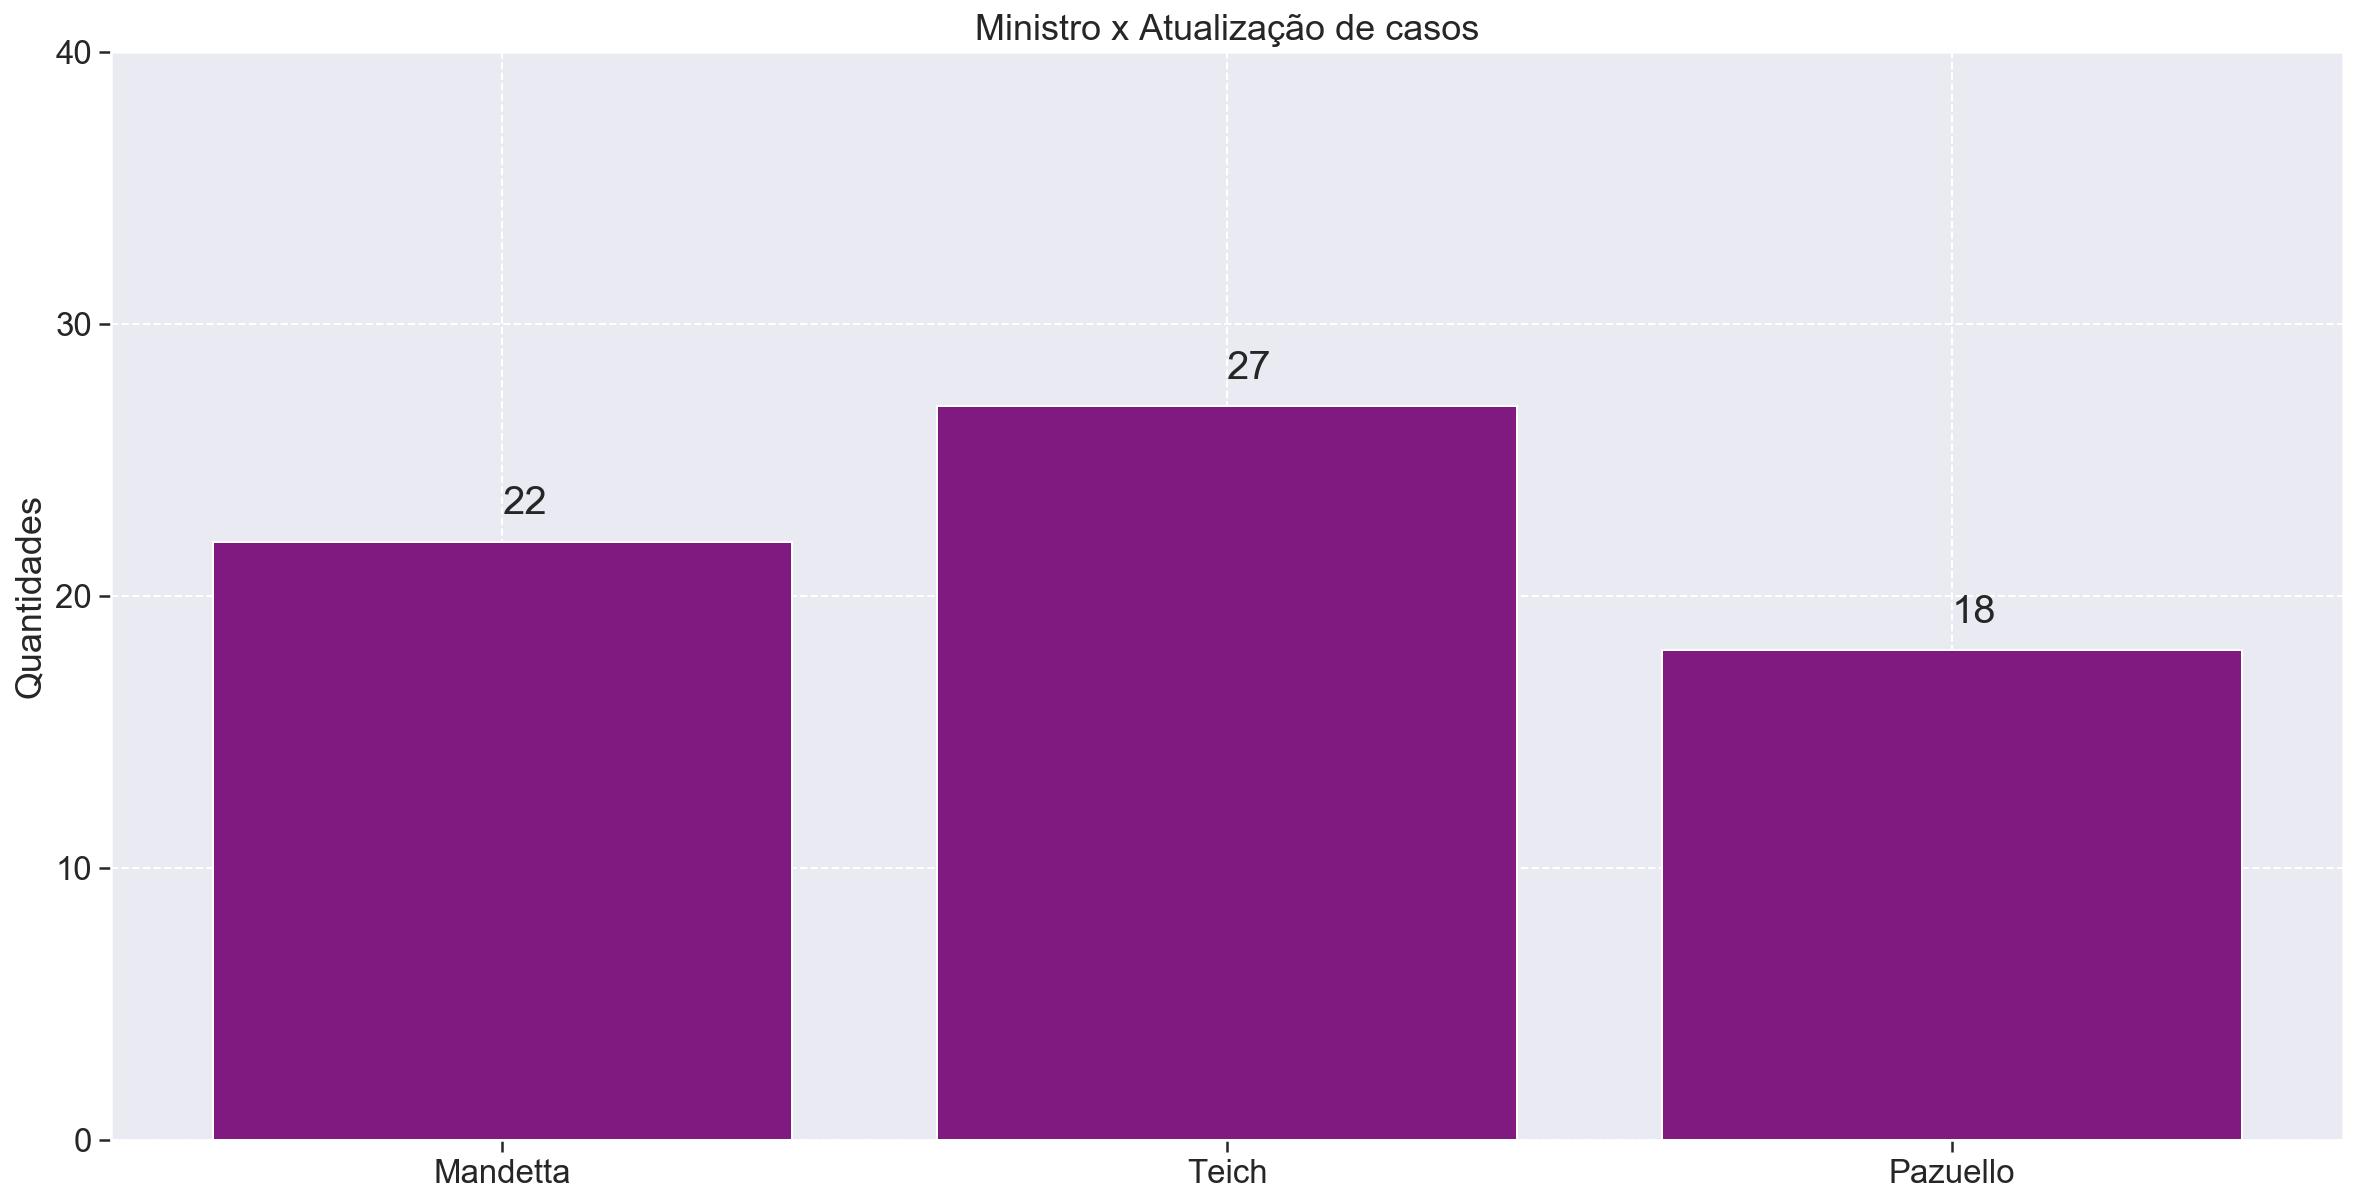

In [38]:
fig=plt.figure(figsize=(20,10))

# Make a fake dataset:
height=[len(mandetta_atualizacao), len(teich_atualizacao), len(pazuello_atualizacao)]
bars=('Mandetta', 'Teich', 'Pazuello')
x_pos=np.arange(0,3,1)
 
# Create bars
plt.bar(x_pos, height)

# Colors
plt.bar(x_pos, height, color = (0.5,0.1,0.5))
 
# Create names on the x-axis
plt.xticks(x_pos, bars, rotation=0)

plt.yticks(np.arange(0, 50, 10))

# Títulos
plt.title('Ministro x Atualização de casos')
plt.ylabel('Quantidades')

# Text on the top of each barplot
for i in range(len(height)):
    plt.text(x = x_pos[i] -.0, y = height[i]+1, s = height[i], size = 20)
    # plt.text(x = -.4, y = height[0]+1, s = height[0], size = 22)


# Show graphic
plt.show()

#### 9. Qual ministro mais reportou a situação atual nas publicações sobre a pandemia? 

In [39]:
# Tabela dos ministros
ministros_atualidades=MS_GERAL_PANDEMIA[MS_GERAL_PANDEMIA['situacao_atual']==1][['ministro','situacao_atual']]
ministros_atualidades=ministros_atualidades.reset_index(drop=True)
ministros_atualidades=ministros_atualidades.rename({'situacao_atual': 'Situação atual'}, axis=1)
ministros_atualidades=ministros_atualidades.rename({'ministro': 'Ministro'}, axis=1)

In [40]:
ministros_atualidades

,Ministro,Situação atual
0,mandetta,1
1,mandetta,1
2,mandetta,1
3,mandetta,1
4,mandetta,1
5,mandetta,1
6,mandetta,1
7,mandetta,1
8,mandetta,1
9,mandetta,1


In [41]:
mandetta_atualidades=MS_GERAL_PANDEMIA[MS_GERAL_PANDEMIA['situacao_atual']==1][MS_GERAL_PANDEMIA['ministro']=="mandetta"][['ministro','situacao_atual']]
mandetta_atualidades=mandetta_atualidades.reset_index(drop=True)

teich_atualidades=MS_GERAL_PANDEMIA[MS_GERAL_PANDEMIA['situacao_atual']==1][MS_GERAL_PANDEMIA['ministro']=="teich"][['ministro','situacao_atual']]
teich_atualidades=teich_atualidades.reset_index(drop=True)

pazuello_atualidades=MS_GERAL_PANDEMIA[MS_GERAL_PANDEMIA['situacao_atual']==1][MS_GERAL_PANDEMIA['ministro']=="pazuello"][['ministro','situacao_atual']]
pazuello_atualidades=pazuello_atualidades.reset_index(drop=True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


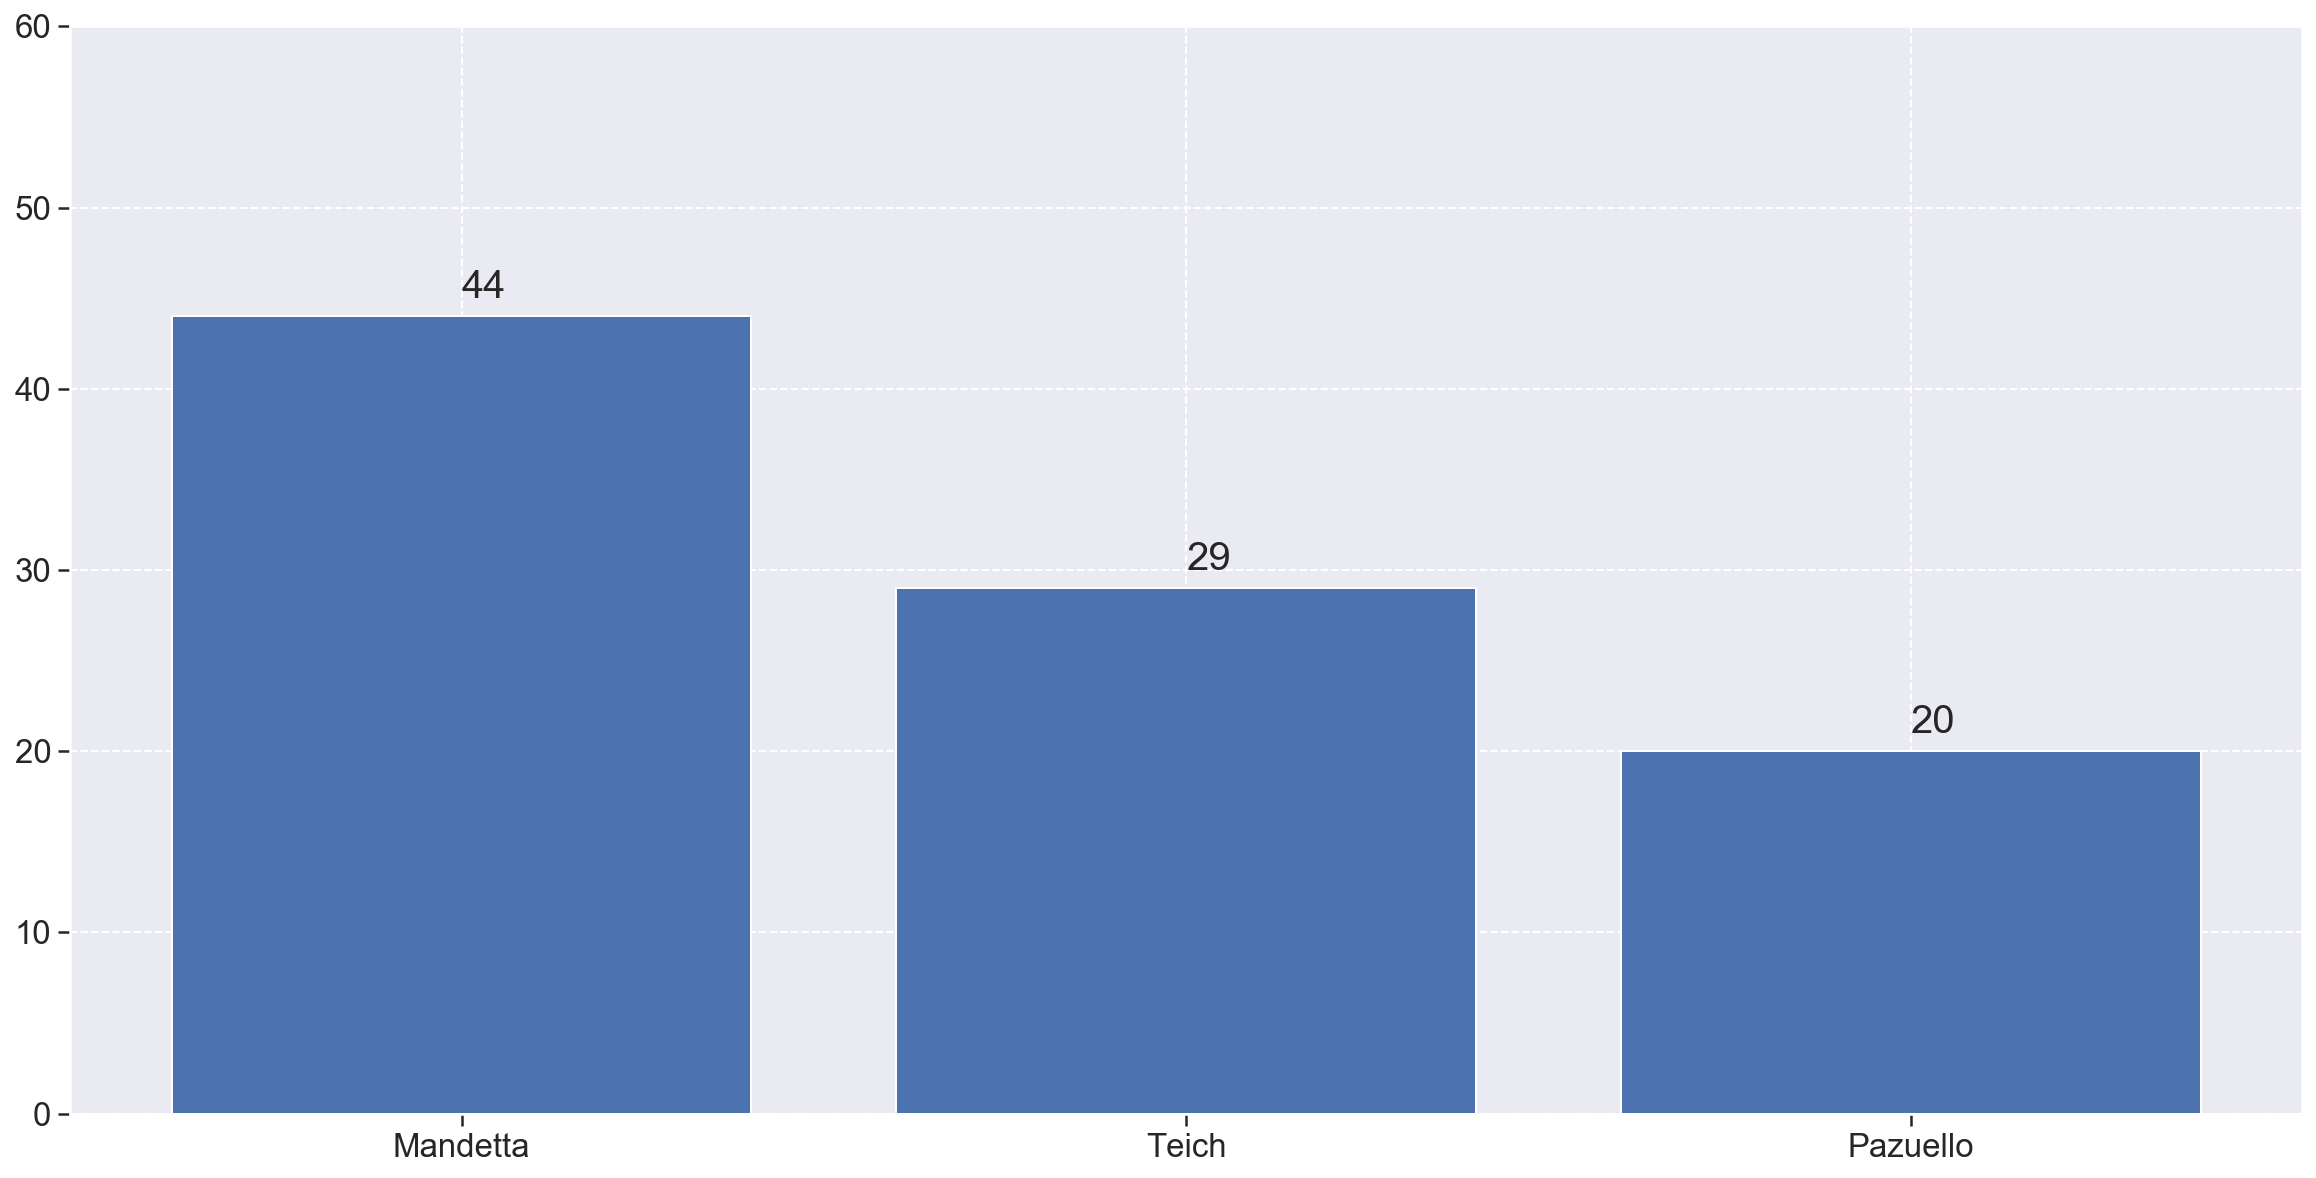

In [42]:
fig=plt.figure(figsize=(20,10))

# Make a fake dataset:
height=[len(mandetta_atualidades), len(teich_atualidades), len(pazuello_atualidades)]
bars=('Mandetta', 'Teich', 'Pazuello')
y_pos=np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.yticks(np.arange(0, 70, 10))

# Text on the top of each barplot
for i in range(len(height)):
    plt.text(x = x_pos[i] -.0, y = height[i]+1, s = height[i], size = 20)
    # plt.text(x = -.4, y = height[0]+1, s = height[0], size = 22)

# Show graphic
plt.show()

#### 10. Qual o tipo de publicação geral?

In [43]:
MS_GERAL["tipo_publicacao"].value_counts()

arte             252
video            101
arte | print      30
print             26
arte | foto       18
foto              11
arte | video       7
documento          1
Name: tipo_publicacao, dtype: int64

In [44]:
tipo=pd.DataFrame(MS_GERAL["tipo_publicacao"].value_counts())
tipo=tipo.reset_index()
tipo.columns=["tipo_publicacao","qtd"]
tipo=tipo.rename({'tipo_publicacao': 'Tipo de publicação'}, axis=1)
tipo

,Tipo de publicação,qtd
0,arte,252
1,video,101
2,arte | print,30
3,print,26
4,arte | foto,18
5,foto,11
6,arte | video,7
7,documento,1


#### 11. Qual o tipo de publicação sobre a pandemia?

In [45]:
MS_GERAL_PANDEMIA["tipo_publicacao"].value_counts()

arte             176
video             87
arte | print      30
print             25
arte | foto       15
foto              10
arte | video       6
documento          1
Name: tipo_publicacao, dtype: int64

In [46]:
tipo_pandemia=pd.DataFrame(MS_GERAL_PANDEMIA["tipo_publicacao"].value_counts())
tipo_pandemia=tipo_pandemia.reset_index()
tipo_pandemia.columns=["tipo_publicacao","qtd"]
tipo_pandemia=tipo_pandemia.rename({'tipo_publicacao': 'Tipo de publicação'}, axis=1)
tipo_pandemia

,Tipo de publicação,qtd
0,arte,176
1,video,87
2,arte | print,30
3,print,25
4,arte | foto,15
5,foto,10
6,arte | video,6
7,documento,1
